In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

### Challenge baseline

In [2]:
#On online version
#df = pd.read_csv('/data_mlhep2017/episode1/DS_1_train.csv', index_col=0)

#On my MAC
df = pd.read_csv('../OPERA_competition_draft_train/DS_1_train.csv', index_col=0)
edata = pd.read_csv('../OPERA_competition_draft_train/DS_1_electron_train.csv')
df.head()

/Users/annarita/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,event_id,X,Y,Z,TX,TY,chi2,signal
index,,,,,,,,
0,-999,61300.121094,64934.265625,28446.0,0.286310,0.096968,1.195497,False
1,-999,49399.164062,63663.652344,54306.0,0.037705,0.097359,1.820736,False
2,-999,58955.164062,33590.734375,24567.0,0.421410,-0.039955,2.799580,False
3,-999,57421.613281,34333.390625,11637.0,0.118750,-0.498493,2.725356,False
4,-999,58730.507812,60918.179688,58185.0,-0.085305,0.078348,2.814739,False


In [3]:
edata.head()

,index,event_id,P,X,Y,Z,TX,TY
0,0,2573,4.751912,39813.222656,16733.853516,37461.781250,0.080777,0.067206
1,1,5435,11.581161,49247.546875,66064.312500,27072.914062,-0.124120,0.004981
2,2,4110,4.723818,40268.484375,15453.179688,8178.457031,0.037599,0.175117
3,3,6421,5.161797,40988.937500,42040.226562,21976.783203,-0.053018,-0.021330
4,4,9112,4.461930,42774.335938,35231.640625,15610.662109,-0.144262,0.159017


### Build a train dataset
Ideally, you could design features here that improve model performance. 

Baseline, however, simply takes some of the features while also balansing classes.

In [4]:
print(df[df.signal==True])

         event_id             X             Y        Z        TX        TY  \
index                                                                        
59           5829  61181.742188  21795.617188  34911.0 -0.019536 -0.041533   
102          5495  41175.601562  24357.005859  69822.0  0.545356  0.576663   
199          2868  49016.367188  31089.613281  40083.0  0.156941  0.576540   
241          8057  60133.843750  61226.679688  58185.0 -0.050178 -0.222777   
252          9553  46859.976562  38369.085938  53013.0 -0.856637  0.351027   
265           135  58772.460938  42313.964844  50427.0  0.336524  0.587179   
268          6533  57126.457031  57612.648438  63357.0 -0.018065  0.036196   
336          4431  48570.730469  34527.496094  60771.0 -0.176703 -0.004946   
354          9111  47594.792969  56426.757812  14223.0 -0.021982  0.080023   
358          6881  58720.468750  18215.597656  63357.0 -0.122511  0.159110   
366          9112  39980.859375  39854.992188  38790.0 -0.060110

In [5]:
print(df[df.signal==False])

         event_id             X             Y        Z        TX        TY  \
index                                                                        
0            -999  61300.121094  64934.265625  28446.0  0.286310  0.096968   
1            -999  49399.164062  63663.652344  54306.0  0.037705  0.097359   
2            -999  58955.164062  33590.734375  24567.0  0.421410 -0.039955   
3            -999  57421.613281  34333.390625  11637.0  0.118750 -0.498493   
4            -999  58730.507812  60918.179688  58185.0 -0.085305  0.078348   
5            -999  38846.828125  59121.539062  28446.0  0.241332 -0.476656   
6            -999  52469.390625  35559.792969  65943.0 -0.433240  0.103088   
7            -999  32216.812500  59256.164062   2586.0  0.159403 -0.223977   
8            -999  64350.226562  45644.132812  53013.0 -0.242950  0.157347   
9            -999  58963.980469   7466.850098   6465.0 -0.001079 -0.395815   
10           -999  29406.375000  42622.218750  41376.0  0.134496

In [6]:
#Trying to display data on a graph
import matplotlib.pyplot as plt
# display plots right inside notebook (not in a popup window)
%matplotlib inline
#to make the dispay interactive
#matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

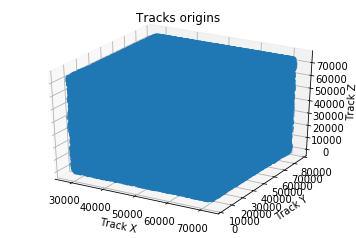

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df.signal==False].values[:,1],df[df.signal==False].values[:,2],df[df.signal==False].values[:,3])
ax.set_title("Bkg tracks")
ax.set_xlabel("Track X")
ax.set_ylabel("Track Y")
ax.set_zlabel("Track Z")

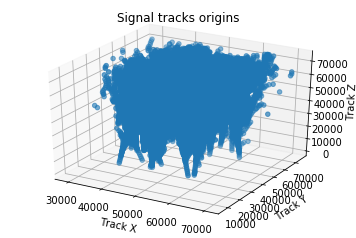

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[df.signal==True].values[:,1],df[df.signal==True].values[:,2],df[df.signal==True].values[:,3])
ax.set_title("Signal tracks")
ax.set_xlabel("Track X")
ax.set_ylabel("Track Y")
ax.set_zlabel("Track Z");

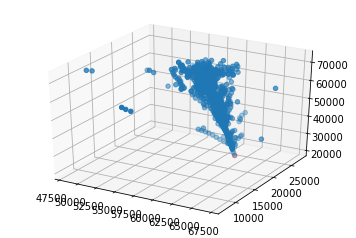

In [105]:
#Plot of one single electron event
event_id_to_plot = 5829 
event_to_plot = df[df["event_id"] == event_id_to_plot]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(event_to_plot["X"], event_to_plot["Y"], event_to_plot["Z"]);
electron_to_plot = edata[edata["event_id"] == event_id_to_plot]
origin_X = edata["X"].where(edata["event_id"] == event_id_to_plot)
origin_Y = edata["Y"].where(edata["event_id"] == event_id_to_plot)
origin_Z = edata["Z"].where(edata["event_id"] == event_id_to_plot)
origin_TX = edata["TX"].where(edata["event_id"] == event_id_to_plot)
origin_TY = edata["TY"].where(edata["event_id"] == event_id_to_plot)
dZ = 5e4
X = [origin_X, origin_X + dZ*origin_TX]
Y = [origin_Y, origin_Y + dZ*origin_TY]
Z = [origin_Z,origin_Z+dZ]
ax.scatter(X, Y, Z, c='r')


In [77]:
#takes the chi2 of all signal tracks + the value of the signal variable
print(df[df.signal==True].values[:,6:8])

[[0.748506426811 True]
 [2.15856051445 True]
 [0.8826647400859999 True]
 ..., 
 [0.690546631813 True]
 [0.7287023663519999 True]
 [2.70805692673 True]]


In [78]:
#takes the chi2 of the first 50000 bkg tracks + the value of the signal variable
print(df[df.signal==False].values[:50000,6:8])

[[1.19549715519 False]
 [1.82073616982 False]
 [2.79957985878 False]
 ..., 
 [0.477863699198 False]
 [1.9450963735599998 False]
 [2.65704417229 False]]


In [73]:
#signal is more scarse => 
train_df = np.concatenate([df[df.signal == True].values[:, 6:8],
                           df[df.signal == False].values[:50000, 6:8]])
#values[,slices some of the features]

print("length array signal+bkg: ", len(train_df))
print("train_df: ", train_df[90790:90800])

('length array signal+bkg: ', 107088)
('train_df: ', array([[2.1495933532700002, False],
       [2.5629394054400003, False],
       [2.4879999160799997, False],
       [1.7716034650799999, False],
       [2.47640967369, False],
       [2.70817518234, False],
       [2.6543211937, False],
       [2.74841356277, False],
       [2.80218863487, False],
       [2.97579789162, False]], dtype=object))


In [77]:

for i in range(0,1):
    print origin_Z[i]
    selBT = df[(df.Z>=origin_Z[i])]
    #Z distance between origin and BT
    DZ = selBT['Z']-origin_Z[i]
    #Projection of the electron at the Z of the BT 
    e_X = origin_X[i]+origin_TX[i]*DZ
    e_Y = origin_Y[i]+origin_TY[i]*DZ
    e_Z = origin_Z[i]+DZ
    #Distance between origin and projected position of the electron at the Z of the BT
    dist = np.sqrt((e_X-origin_X[i])**2+(e_Y-origin_Y[i)**2+(e_Z-origin_Z[i)**2)
    #Max radius of the cone with 50 mrad apertur in which I search BT
    R = dist*np.tan(0.1)
    #Distance at BT_Z between BT and projected electron
    d = np.sqrt((selBT['X']-e_X)**2+(selBT['Y']-e_Y)**2)
    #print(R)
    #Slope difference between electron track and BT
    DSX = selBT['TX'].where(d<R)-origin_TX[i]
    DSY = selBT['TY'].where(d<R)-origin_TY[i]
    #projection of BT at Z of vertex
    projBT_X = selBT['X'].where(d<=R)- DZ*selBT['TX'].where(d<=R)
    projBT_Y = selBT['Y'].where(d<=R)- DZ*selBT['TY'].where(d<=R)
    #IP estimation
    IP = np.sqrt((projBT_X-origin_X[i])**2+(projBT_Y-origin_Y[i])**2)
    

bins = np.linspace(0, 100000, 100)
plt.hist(DZ, bins, normed=True)
plt.show()


100


"\nfor i in range(0,1):\n    print origin_Z[i]\n    selBT = df[(df.Z>=origin_Z[i])]\n    #Z distance between origin and BT\n    DZ = selBT['Z']-origin_Z[i]\n    #Projection of the electron at the Z of the BT \n    e_X = origin_X[i]+origin_TX[i]*DZ\n    e_Y = origin_Y[i]+origin_TY[i]*DZ\n    e_Z = origin_Z[i]+DZ\n    #Distance between origin and projected position of the electron at the Z of the BT\n    dist = np.sqrt((e_X-origin_X[i])**2+(e_Y-origin_Y[i)**2+(e_Z-origin_Z[i)**2)\n    #Max radius of the cone with 50 mrad apertur in which I search BT\n    R = dist*np.tan(0.1)\n    #Distance at BT_Z between BT and projected electron\n    d = np.sqrt((selBT['X']-e_X)**2+(selBT['Y']-e_Y)**2)\n    #print(R)\n    #Slope difference between electron track and BT\n    DSX = selBT['TX'].where(d<R)-origin_TX[i]\n    DSY = selBT['TY'].where(d<R)-origin_TY[i]\n    #projection of BT at Z of vertex\n    projBT_X = selBT['X'].where(d<=R)- DZ*selBT['TX'].where(d<=R)\n    projBT_Y = selBT['Y'].where(d<=R)

In [96]:
def distance3D(x1,y1,z1,x2,y2,z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
def distance2D(x1,y1,x2,y2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2)
def projection(x,theta,dz):
    return x+theta*dz
def IP(p_xBT,p_yBT,x0,y0):
    return distance2D(p_xBT,p_yBT,x0,y0)

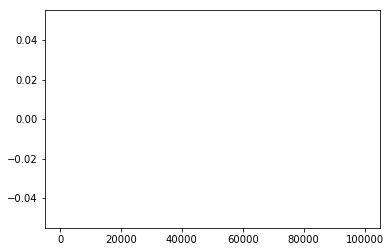

In [119]:
Tdf = np.concatenate([df[df.signal == True].values[:, 0:8],
                           df[df.signal == False].values[:50000, 0:8]])



#Try to compute IP of each track from e vertex 
#IP = distance between the vertex position and the projection of each BT on the vertex plane
#DZ = distance between considered BT and vtx along Z axis

#Selection of tracks downstream wth respect to the electron origin
origin_X = np.array(edata['X'])
origin_Y = np.array(edata['Y'])
origin_Z = np.array(edata['Z'])
origin_TX = np.array(edata['TX'])
origin_TY = np.array(edata['TY'])
event_id = np.array(edata['event_id'])

DZ = np.array([])
D_TX = np.array([])
D_TY = np.array([])


for i in range(0,100):
    selBT = Tdf[Tdf[:,3]>=origin_Z[i]]
    np.append(DZ, selBT[:,3]-origin_Z[i])
    np.append(D_TX,selBT[:,4]-origin_TX[i])
    np.append(D_TY, selBT[:,5]-origin_TY[i])
    


bins = np.linspace(0, 100000, 100)
plt.hist(DZ, bins)
plt.show()

In [74]:
#
X_train = train_df[:, 0].reshape(-1, 1)
print (X_train[90790:90800])
y_train =  np.array(train_df[:, 1], dtype = int)
print (y_train[90790:90800])

[[2.1495933532700002]
 [2.5629394054400003]
 [2.4879999160799997]
 [1.7716034650799999]
 [2.47640967369]
 [2.70817518234]
 [2.6543211937]
 [2.74841356277]
 [2.80218863487]
 [2.97579789162]]
[0 0 0 0 0 0 0 0 0 0]


In [34]:
train_df = np.concatenate([selBT[selBT.signal == True].values[:, 6:8],
                           selBT[selBT.signal == False].values[:50000, 6:8]])
print(train_df)

[[0.748506426811 True]
 [2.15856051445 True]
 [0.8826647400859999 True]
 ..., 
 [0.477863699198 False]
 [1.9450963735599998 False]
 [2.65704417229 False]]


### Train a model

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 1)

clf.fit(X_train,y_train)

#to define best classifier, look at accuracy or ROC curve


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Prediction

In [11]:
df_test = pd.read_csv('/data_mlhep2017/episode1/DS_1_test.csv', index_col=0)
df_test.head()

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,X,Y,Z,TX,TY,chi2
index,,,,,,
0,37259.390625,62516.367188,63357.0,-0.475465,-0.250186,1.405402
1,41426.312500,57520.265625,25860.0,-0.213876,0.155208,2.541856
2,40752.921875,54653.265625,46548.0,0.044215,-0.333426,2.389629
3,29293.980469,23582.425781,14223.0,-0.265671,-0.137444,2.402328
4,49538.128906,63314.617188,31032.0,-0.063467,-0.550298,1.223460


In [12]:
prediction = clf.predict_proba(df_test.values[:, 5].reshape(-1, 1))[:, 1]

### Save results

In [14]:
baseline = pd.DataFrame(prediction, columns=['Prediction'])
baseline.index.name = 'Id'
baseline.to_csv('Mybaseline.csv', header=True)

You can now download the baseline.csv in jupyter file browser and send it to Kaggle.